In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy
import pandas
import glob
import re
import csv
import torch

#Nonsupervised Learning Grouping#

##Grouping##

Unsupervised learning grouping consists in providing an algorithm data without labels, the model must discover by itself patterns and assign labels to those patterns.

Grouping is the process of generating subsets of the dataset based on an inherent pattern. Given the input matrix X the process can be described as generating (k) groups:

$X = {X_1, X_2, ..., X_i, ...,X_k} \quad X_i \subset X$

$\sum_{\forall i} |X_i| = |X|$

Meaning that every sample will have only one associated group. To show this we will generate a dataset with no labels but with a clear pattern that shows 3 distinct groups:

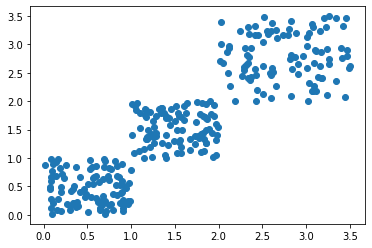

In [ ]:
numberSamples = 100
sampleDimension = 2
X = numpy.concatenate( (numpy.random.rand(numberSamples,sampleDimension) , 
                        1+numpy.random.rand(numberSamples,sampleDimension), 
                        2+1.5*numpy.random.rand(numberSamples,sampleDimension) ));

# X = numpy.concatenate( (numpy.random.rand(numberSamples,sampleDimension) , 
#                        1+numpy.random.rand(numberSamples,sampleDimension), 
#                        2+3*numpy.random.rand(numberSamples,sampleDimension),
#                        3+1.5*numpy.random.rand(numberSamples,sampleDimension),
#                        4+1.5*numpy.random.rand(numberSamples,sampleDimension) ));

plt.scatter( X[:,0], X[:,1] )
plt.show()

##kMeans##

k-means is a model that asigns the data to their groups based on their centroids. It is a minimization task given by:

$min \sum_{\forall k} \sum_{x\in S_i} || x-\mu_k ||^2$

Where each cluster centroid $k$ location is given by $\mu_k$, each centroid is assigned to each group $S$. A simple manual implementation consists in calculating all the distances between clusters and then the min argument for each iteration:

Text(0, 0.5, 'Loss')

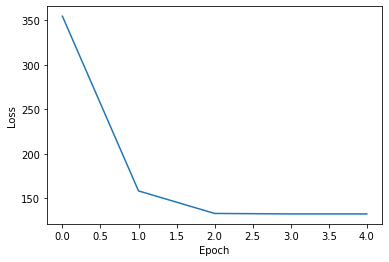

In [ ]:
import numpy.linalg as LA

# Number of labels wanted
numberLabelsK = 3
# Starting RANDOM labels
labels = numpy.random.randint( numberLabelsK, size=(1,len(X)) )[0]

# Using the mean of the data to find the centroids
def Centroids(inputDataX, labelsList, numberLabelsK):
    centroidsList = []
    for label in range(numberLabelsK):
        centroidsList.append( numpy.mean( inputDataX[labelsList==label] , axis=0) )
    return centroidsList

# Selecting the centroids that minimize the distance and update the labels
# Also give the total distance reduction for the overfitting test
def Labels(inputDataX, centroidsList):
    distancesList = []
    for centroid in centroidsList:
        distance = LA.norm(inputDataX-centroid, axis=1)
        distance = distance.reshape(-1,1)
        distancesList.append(distance)
    distancesList = numpy.concatenate(distancesList, axis = 1)
    newLabels = numpy.argmin(distancesList, axis=1)
    Loss = numpy.min(distancesList, axis = 1)
    totalLoss = Loss.sum()
    return newLabels, totalLoss

# Epochs and overfitting test (Loss)
lossPerEpoch = []
numEpochs = 5
calculatedLoss = 0
for epoch in range(numEpochs):
    centroids = Centroids(X, labels, numberLabelsK)
    labels, calculatedLoss = Labels(X, centroids)
    lossPerEpoch.append(calculatedLoss)

plt.plot(lossPerEpoch)
plt.show
plt.xlabel('Epoch')
plt.ylabel('Loss')

##ARI##

ARI or adjusted random index is a measurement of the similarity between two datasets. It is the index of correlation from data samples that are close to eachother while also accounting for random interference.

ARI can be used to measure grouping models, however it doesn't care if each sample is in the correct group instead it just shows if the model has created clearly defined and distinct groups. 

If the model was able to create distinct groups we can infer that it has also assigned the correct groups.

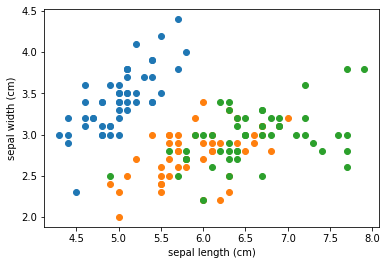

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
data = load_iris()
X = data.data
Y = data.target
# We can visualize the relation between dimensions 0,1,2,3
Dim0 = 0
Dim1 = 1
plt.scatter (X[Y == 0,Dim0] , X[Y == 0 ,Dim1])
plt.scatter (X[Y == 1,Dim0] , X[Y == 1 ,Dim1])
plt.scatter (X[Y == 2,Dim0] , X[Y == 2 ,Dim1])
plt. xlabel (data. feature_names [Dim0])
plt. ylabel (data. feature_names [Dim1])
plt.show ()

In [ ]:
# Load dataset
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
data = load_iris()
X = data.data
Y = data.target
# Only use dimensions 2 and 3
X = X[:, [2,3]];

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

ARI = []
MODEL_ITERATIONS = 7
numberKClustersList = range(1, MODEL_ITERATIONS)

for kClusters in numberKClustersList:
  Model = KMeans ( n_clusters=kClusters, random_state = 0).fit(X)
  Y_hat = Model.labels_
  ari = adjusted_rand_score(Y, Y_hat)
  ARI.append(ari)

DF = pandas.DataFrame()
DF = DF.assign(K = numberKClustersList)
DF = DF.assign(ARI = ARI)
DF

,K,ARI
0,1,0.000000
1,2,0.558371
2,3,0.885697
3,4,0.685958
4,5,0.669860
5,6,0.649836
